In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import lfilter
from scipy import signal

In [2]:
def import_data(file_loc, truncate=True, debug = False):
    captured_data = np.load(file_loc)
    input0_offset=np.argmax((captured_data[0]>0).astype(int))
    input1_offset=np.argmax((captured_data[1]>0).astype(int))
    output0_offset=np.argmax((captured_data[2]>0).astype(int))
    output1_offset=np.argmax((captured_data[3]>0).astype(int))
    
    # Truncate to 12 bits from 16
    input0 = captured_data[0]
    input1 = captured_data[1]
    if(truncate):
        input0 = np.right_shift(input0,4)
        input0 = np.left_shift(input0,4).astype(np.int16)
        
        input1 = np.right_shift(input1,4)
        input1 = np.left_shift(input1,4).astype(np.int16)

    output0 = captured_data[2]
    output1 = captured_data[3]

    if(debug):
        print("input0_offset: %s"%(input0_offset))
        print("input1_offset: %s"%(input1_offset))
        print("output0_offset: %s"%(output0_offset))
        print("output1_offset: %s"%(output1_offset))

        print("input0_offset%%8: %s"%(input0_offset%8))
        print("input1_offset%%8: %s"%(input1_offset%8))
        print("output0_offset%%8: %s"%(output0_offset%8))
        print("output1_offset%%8: %s"%(output1_offset%8))

        print("input 0 first value: %s"%input0[input0_offset])
        print("input 1 first value: %s"%input1[input1_offset])
    
    return (input0, input1, output0, output1, input0_offset, input1_offset, output0_offset, output1_offset)

# Simulation

In [14]:
def manual_fir_section(coeffs, x):
    x = np.array(x)
    y = np.zeros(len(x))
    for coeff_set in coeffs:
        for i in range(len(coeff_set), len(x)):
            total = 0
            for j in range(len(coeff_set)):
#                 print(coeff_set[j])
                total += coeff_set[j] * x[i-j]
            y[i] = total
        x=np.copy(y)
        y=np.zeros(len(x))
    return x

In [15]:
data = import_data("CaptureData/capture_240822_A_0_B_1_impulse_X1_16384_f_after.npy")
input0 = data[0]
input1 = data[1]
output0 = data[2]
output1 = data[3]
input0_offset = data[4]
input1_offset = data[5]
output0_offset = data[6]
output1_offset = data[7]

In [16]:
known_delay = output0_offset - input0_offset - 1 # The 1 is from the delay inherent in the z^-1 of the first filter

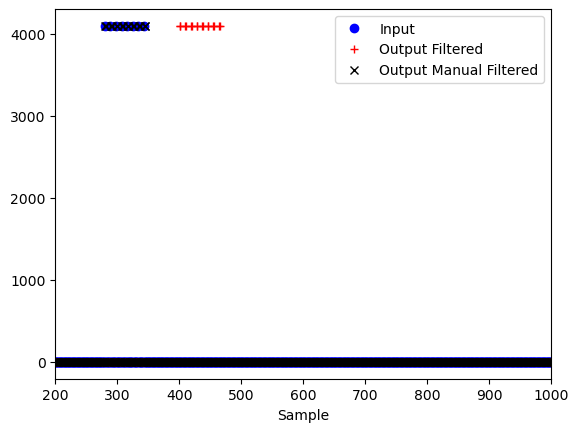

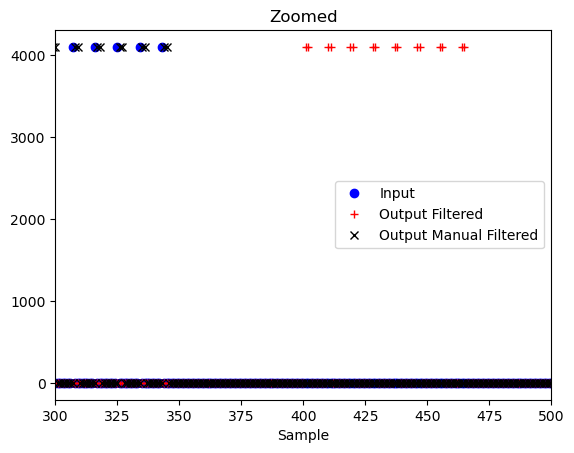

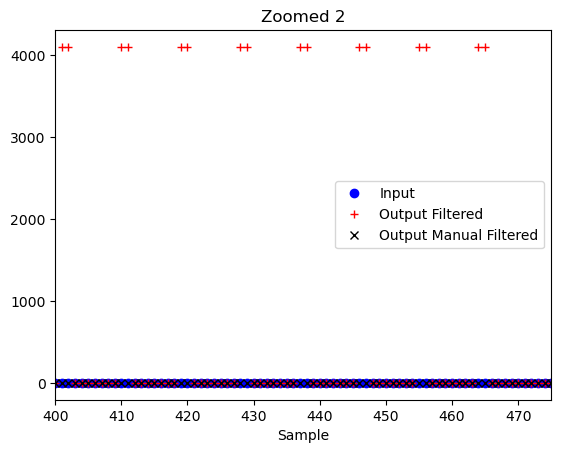

In [19]:
zero_fir_coeff = np.array([0,1,0], dtype=float)
pole_fir_coeff = np.array([1,1,0,0,0,0], dtype=float)

output0_filtered_step1 = lfilter(zero_fir_coeff, [1], input0)
# print(np.array(output0_filtered))
output0_filtered = lfilter(pole_fir_coeff, [1], output0_filtered_step1)
output0_filtered = np.concatenate((np.zeros(known_delay), np.array(output0_filtered)))

output0_manual_filtered = manual_fir_section(([0,1,0],[1,1,0,0,0,0]),input0)

plt.title("")
plt.plot(np.array(range(len(input0))), input0, linestyle="None", 
         marker="o", label = "Input", color="b")
# plt.plot(np.array(range(len(output0))), output0, linestyle="None", 
#          marker="x", label = "Output", color="g")
plt.plot(np.array(range(len(output0_filtered))), output0_filtered, linestyle="None", 
         marker="+", label = "Output Filtered", color="r")
plt.plot(np.array(range(len(output0_manual_filtered))), output0_manual_filtered, linestyle="None", 
         marker="x", label = "Output Manual Filtered", color="k")
plt.xlabel("Sample")
plt.legend()
plt.xlim(200,1000)
plt.show()


plt.title("Zoomed")
plt.plot(np.array(range(len(input0))), input0, linestyle="None", 
         marker="o", label = "Input", color="b")
# plt.plot(np.array(range(len(output0))), output0, linestyle="None", 
#          marker="x", label = "Output", color="g")
plt.plot(np.array(range(len(output0_filtered))), output0_filtered, linestyle="None", 
         marker="+", label = "Output Filtered", color="r")
plt.plot(np.array(range(len(output0_manual_filtered))), output0_manual_filtered, linestyle="None", 
         marker="x", label = "Output Manual Filtered", color="k")
plt.xlabel("Sample")
plt.legend()
plt.xlim(300,500)
plt.show()

plt.title("Zoomed 2")
plt.plot(np.array(range(len(input0))), input0, linestyle="None", 
         marker="o", label = "Input", color="b")
# plt.plot(np.array(range(len(output0))), output0, linestyle="None", 
#          marker="x", label = "Output", color="g")
plt.plot(np.array(range(len(output0_filtered))), output0_filtered, linestyle="None", 
         marker="+", label = "Output Filtered", color="r")
plt.plot(np.array(range(len(output0_manual_filtered))), output0_manual_filtered, linestyle="None", 
         marker="x", label = "Output Manual Filtered", color="k")
plt.xlabel("Sample")
plt.legend()
plt.xlim(400,475)
plt.show()


# Actual Data

In [ ]:
data = import_data("CaptureData/capture_082124_A_0_B_1_impulse_Xall_16384_fg.npy")
input0 = data[0]
input1 = data[1]
output0 = data[2]
output1 = data[3]
input0_offset = data[4]
input1_offset = data[5]
output0_offset = data[6]
output1_offset = data[7]

In [ ]:
plt.title("")
plt.plot(np.array(range(len(input0))), input0, linestyle="None", 
         marker=".", label = "Input", color="b")
plt.plot(np.array(range(len(output0))), output0, linestyle="None", 
         marker=".", label = "Output", color="r")
plt.xlabel("Sample")
plt.legend()
plt.xlim(200,1000)
plt.show()

# plt.plot(np.array(range(len(captured_data[1]))), captured_data[1], linestyle="None", 
#          marker=".", label = "In ADC 1")
# # print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
# plt.xlabel("Samples")
# plt.legend()
# plt.xlim(200,1000)
# plt.show()

# plt.title("Post Filter Out")
# plt.plot(np.array(range(len(captured_data[2]))), captured_data[2], linestyle="None", 
#          marker=".", label = "Out DAC 6")
# # print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
# plt.xlabel("Samples")
# plt.legend()
# plt.xlim(200,1000)

# plt.plot(np.array(range(len(captured_data[3]))), captured_data[3], linestyle="None", 
#          marker=".", label = "Out DAC 7")
# # print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
# plt.xlabel("Samples")
# plt.legend()
# plt.xlim(200,1000)
# plt.show()